## Intro to Machine Learning Part 1

This workshop will guide you through the basics of using supervised machine learning techniques using the __pandas__ and __scikit-learn__ libraries. The focus of this workshop is not to guide you through the specifics of manipulating your data at each step but to provide a high-level overview of what you need to do to create a simple regression or classification model.

The slides to the workshop can be found [here](https://tinyurl.com/cads-ml-intro).

### Terms You Need to Know
- Data Set: a collection of data typically presented in tabular format
- Feature: a column in a data set; a measurable quality
- Tidy data: structuring data sets in a standard manner; each row represents a single observation
- Imputation: the process of replacing missing data with substituted data
- Encoding: process of representing data into a different form; commonly used to represent categorical as numerical data for many models like linear regression and logistic regression
- Feature scaling: the processing of preparing data to minimize overfitting; use to increase performance of models (i.e. distance-based and gradient descent-based algorithms) by making the values of features (or range) more similar to each other
- Standardization: transform feature values to have zero mean and a variance of 1; make data unitless and features comparable to each other
- Normalization: transform feaure values to a range of [0, 1] or [-1, 1]; a.k.a. min-max scaling; useful when data doesn't follow normal distribution
- Training data set: the subset of a data set used for training a machine learning model
- Validation data set: the subset of the training data set used to tune hyperparameters
- Testing Data Set: the subset of a data set used to assess performance on a machine learning model after training
- Model parameter: a variable which is used to define a model and can be estimated from the data
- Model hyperparameter: a variable which is used to tune a model and cannot be estimated from data (i.e. you have to adjust it yourself)
- Supervised learning: a machine learning task where the data set has an experimental or known value the model will predict (i.e. the data set is labeled)
- Unsupervised learning: a machine learning task where there is no known value the model will predict for in the data set (i.e. the data set is unlabled or untagged); the model will find patterns or groupings in the data set not specified beforehand
- Cross Validation: used to ensure the model is robust and is not overfitted; the most common method is K-fold cross validation where the data set is split into subsets and the model is trained and assessed on those subsets
- Metric: values that can be used to make a decision (ie. tell you how well your model is performing and how well it is comparing to other models)
- Underfitting: occurs when a model performs poorly on the training and other data
- Overfitting: occurs when a model fits and performs really well on the training data but performs poorly on other data

### Pipeline
Here are steps that are commonly taken by data scientists and ML engineers for their machine learning projects. At each step, there are questions to consider when constructing your pipeline. This guide will still be used as a basis, however, we will not go into the specifics at each step. I strongly encourage you to research each step to improve your own pipelines.

![Questions to ask for your ML pipeline](pipeline.png)

### Classification

The goal of classification is to predict discrete values. The common classification algorithms are:
- Logistic Regression
- Naive Bayes Classifier
- Support Vector Machines
- Decision Trees
- K-Nearest Neighbor
- Random Forest

#### Logistic Regression

##### Data Collection

- _Where are you getting this data from?_
- _Is the entire data set relevant?_

<br />

https://www.kaggle.com/uciml/pima-indians-diabetes-database

> "This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."
<br /><br />"The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on."
<br /><br />"Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?"

<br />

The __pandas__ package can be used to easily manipulate tabular data (i.e. data mungling/wrangling), prepare it for visualization, and run statistical analysis on it. It uses tables, or an object of rows and columns, called _data frames_ to format data. The package contains several functions to read data in various formats like CSV, Excel, SQL, and HTML among many others.

In [1]:
import pandas as pd
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Data Preparation

- _Is the data "tidy?"_
- _Can features be dropped or created?_
- _What modifications will the data need to train a model on it?_


In [2]:
# 1. Does my data contain only numerical features? If not, should I encode or remove/drop the categorical features?
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
# 2. Is there any duplicated data or rows that need to be dropped?
diabetes.duplicated().sum()

0

In [3]:
# 3. Is there any missing data? If so, should we impute it or drop those features with the missing data?
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The __matplotlib__ and __seaborn__ packages can be used to visualize data in a format that is easily read and understood. Here, we are using matplotlib and seaborn to view the correlation matrix (i.e. a plot which shows correlation or R-value between features). This will aid in assesing whether or not multicolinearity is present in our data set.

Why is multicolinearity an issue? Logisitic regression relies on several of the same assumptions as linear regression and assumes each variable for "X" is independent and normally distributed. Keeping two features that are colinear will produce unreliable coefficients or bias terms for those features and can cause the model to overfit the data. There are several ways to detect multicolinearity (e.g. VIF, eigenvalues) but we will be using the correlation coefficient or R-values. A strong correlation is likely an indicator multicolinearity is present.

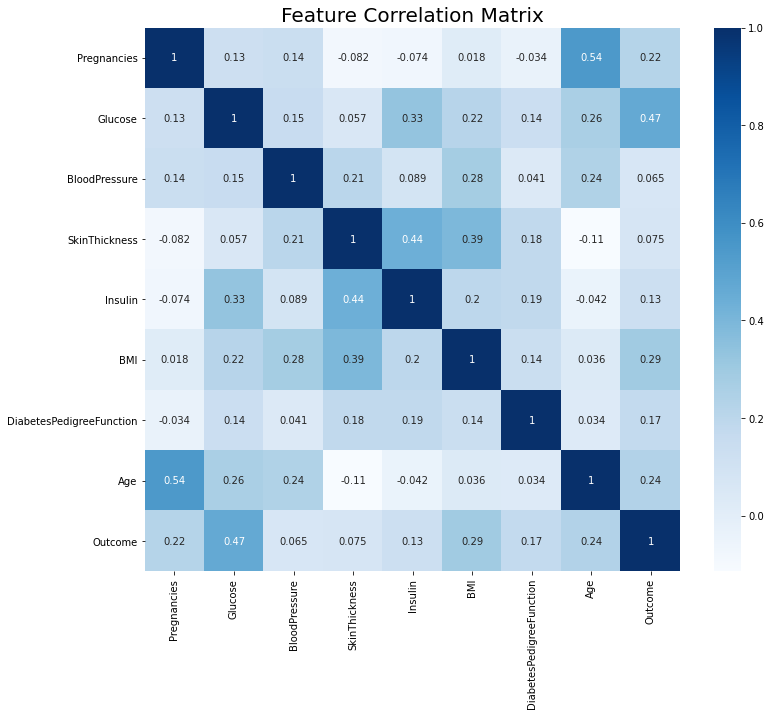

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Is there multicolinearity present in the data? 
#    Are there features that are colinear or linearly dependent that we can drop?
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

What are the assumptions for logistic regression? Discussing this during the preprocessing or the data preparation step is essential to figure out what additional steps are needed to manipulate our data for best performance in our model. Logistic regression makes the following assumptions:
- The dependent variable is either binary or ordinal depending on whether we are aiming for binary logistic regression or ordinal logisitic regression, respectively.
- Each observation, or each row, in the data set should be independent from each other.
- There is little to low multicolinearity present among the independent variables.
- There is linearity of independent variables and log odds, so the independent variables should be linearly related to the log odds. Linearity between the independent variables and the dependent variable is only assumed for linear regression not logistic regression.
- There is a large sample size.

Because of these assumptions, we may need to either normalize or standardize the data. The goal of normalziation is to change numerical values to a common range. It is useful to use when you do not know the distribution of your features or the distribution of your features is not normal and your features have varying scales and the algorithm doesn't make any assumptions of the data's distribution as in k-Nearest Neighbors and neural networks.

The goal of standardization is to be able to compare features with different units by centering the feature with a mean of 0 and a standard deviation of 1. It is useful when your features have varying scales and the algorithm assumes the data's distrubution s 

In [73]:
# 5. Do the features need to normalized or standardized?
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

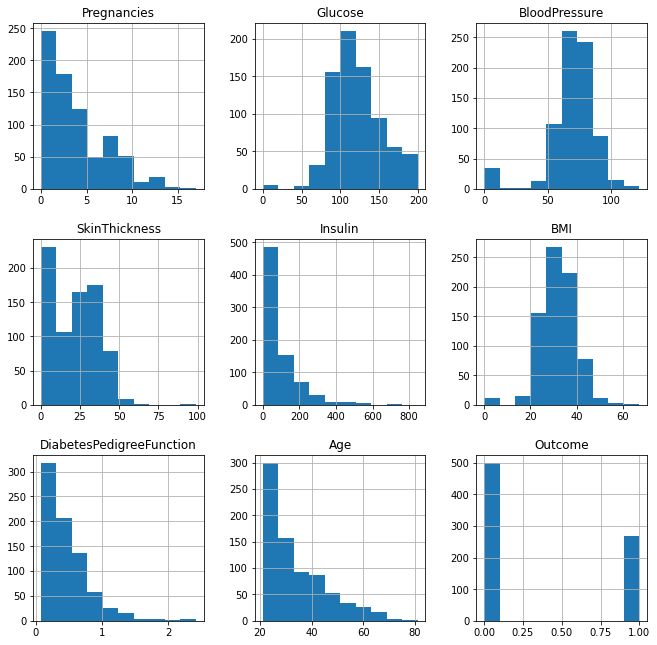

In [100]:
diabetes.hist(figsize=(11,11))

In [91]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# diabetes_X = sc.fit_transform(diabetes.drop('Outcome', axis=1))

##### Model Training

- _Which model makes sense for my data and predictions?_
- _How can the data set be split to train and test the model without overfitting?_

Before a model is trained, data sets are typically split into two subsets: the training data set and the testing data set. The ratio of the split can be 75% training-15% testing, 60% training-40% testing, 80% training-20% testing, or any other ratio that seems suitable based on the size of your data set and what model you are using. You want to use a higher ratio for your training-testing split if the size of your data set is smaller so the model can have as much data as possible. If your data set is not large enough, you can use alternative methods like k-fold cross validation.

The train-test prodedure is commonly used if it becomes costly to repeatedly train your model. Often times, the a validation data set is also created from a subset of the training data set and used to fine tune the model's hyperparameters. Using a validation data set and tuning the hyperparameters is outside the scope of this intro workshop, so we will not be needing this.

The __scikit-learn__ package has a function that randomly splits the data set into training and testing data sets as specified by the train-test ratio.

In [101]:
# 6. Which features do I need to train the model?
diabetes_X = diabetes.drop('Outcome', axis=1)
diabetes_y = diabetes['Outcome']

# 7. At what ratio should I split my training and testing data?
from sklearn.model_selection import train_test_split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
    train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=42)

The __scikit-learn__ package has many machine learning models you can use across supervised and unsupervised learning. Here, we will use the package to fit and train a logistic regression model.

You can also tune your model's hyperparameters here like change the penalty function or the solver (i.e. optimization algorithm). We do not use any hyperparameters here because it is outside the scope of this workshop. You can look up all the hyperparameters available on the [package documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The _max_iter_ parameter tells the model the maximum of iterations needed for the algorithm to converge (i.e. when the model's error get as close as possible to zero or the minimum).

In [103]:
# fit training data to model and adjust any hyperparameters
from sklearn.linear_model import LogisticRegression
diabetes_model = LogisticRegression() # max_iter=200
diabetes_model.fit(diabetes_X_train, diabetes_y_train)

# get prediction for a row
print(diabetes_X_test[5:6])
print(diabetes_model.predict(diabetes_X_test[5:6]))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
204            6      103             72             32      190  37.7   

     DiabetesPedigreeFunction  Age  
204                     0.324   55  
[0]


##### Model Evaluation

- _Which metrics can you use to assess your model?_
- _Is the model's confusion matrix meaningful?_
- _Do other models have improved metric scores?_

One way to assess classification tasks is to use a confusion matrix. A confusion matrix shows the model's:
- True positives (top left): the number of positive observations and classified as positive by the model
- True negatives (bottom right): the number of negative observations and classified as negative by the model
- False positives (top right): the number of negative observations that are classified as positive by the model
- False negatives (bottom left): the number of positive observations that are classified as negative by the model

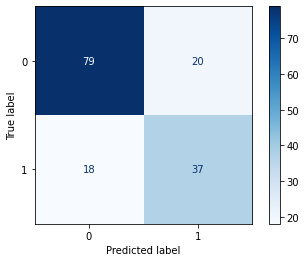

In [104]:
# 8. What does the model's confusion matrix tell us?
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(diabetes_y_test, diabetes_y_hat),
                              display_labels=diabetes_model.classes_)
cm.plot(cmap="Blues")

Several metrics exist for you to assess your model's performance. These metrics can differ depending on the task you are trying to achieve, for instance, classification and regression tasks are assessed via different metrics. The common metrics available for classification tasks are:
- Accuracy: the percentage of observations classified correctly by the model; (true positive + true negative) / total observations; use if avoiding both false positives and false negatives; is not useful if there are not the same number of positive and negative cases in the data set
- Precision: the percentage of positive observations classifed correctly as positive by the model; true positve / (true positive + false positive); use if avoiding false positives is important
- Recall or sensitivity: the percentage of observations classified correctly as positive by the model; true positive / (true positive + false negative); use if avoiding false negatives is important
- F1-score: a metric that is a balance between precision and recall (2 * (precision * recall) / (precision + recall); use if there is a large number of true negatives and avoiding false positives and false negatives is important

In [105]:
# 9. What do common metrics for the model tell us?
diabetes_y_hat = diabetes_model.predict(diabetes_X_test)
print("Accuracy:", accuracy_score(diabetes_y_test, diabetes_y_hat))
print("Precision:", precision_score(diabetes_y_test, diabetes_y_hat))
print("Recall:", recall_score(diabetes_y_test, diabetes_y_hat))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


In [106]:
# get your prediction and run metrics on it
from sklearn.metrics import classification_report
print(classification_report(diabetes_y_test, diabetes_y_hat))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



The AUC-ROC curve is also a plot uses to assess your classification model. The plot shows the false positive rate on the bottom axis and the true positive rate on the left axis. The ROC is a probability curve and the AUC represents the degree or measure of seperability (i.e. how well the model is capable of distinguishing between classes or at predicting 0s as 0s and 1s as 1s). An AUC of 1 is ideal where an AUC of 0 is the worst. An AUC of 0.5 means the model is not able to distinguish between classes whatsoever. We also want the ROC curve to be as close as possible to the point (0 FPR, 1 TPR). 

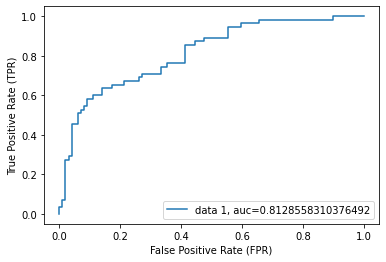

In [107]:
# AUC-ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = diabetes_model.predict_proba(diabetes_X_test)[::,1]
fpr, tpr, _ = roc_curve(diabetes_y_test,  y_pred_proba)
auc = roc_auc_score(diabetes_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.show()

### Regression

The goal of regression is to predict continuous values. The common regression algorithms are:
- Linear Regression
- Polynomial Regression
- Poisson Regression

#### Linear Regression

##### Data Collection

- _Where are you getting this data from?_
- _Is the entire data set relevant?_

<br />

In [109]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### Data Preparation

- _Is the data "tidy?"_
- _Can features be dropped or created?_
- _What modifications will the data need to train a model on it?_


In [110]:
# 1. Does my data contain only numerical features? If not, should I encode or remove/drop the categorical features?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [111]:
# 2. Is there any duplicated data or rows that need to be dropped?
housing.duplicated().sum()

0

In [112]:
# 3. Is there any missing data? If so, should we impute it or drop those features with the missing data?
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

What are the assumptions for linear regression? Like logistic regression, linear regression also makes several assumptions. Discussing this during the preprocessing or the data preparation step is essential to figure out what additional steps are needed to manipulate our data for best performance in our model. Linear regression makes the following assumptions:
- The relationship between the independent variables and the dependent variable is linear.
- The independent variables are normally distributed. This can be checked with a histogram or a Q-Q plot. A transformation (e.g. log, or log-log) can fix the issue if a variable/feature is not normally distributed.
- There is little to no multicolinearity present among the independent variables. This can be checked with the correlation matrix.
- There is little to no autocorrelation in the data. Do not worry if you don't know what this means as it is mostly relevant for time-series data and is outside the scope of this workshop.
- The data is homoscedastic, or the residuals (i.e. the error or difference between the actual and predicted value) are cented around a zero mean. This can be checked with a residual plot.

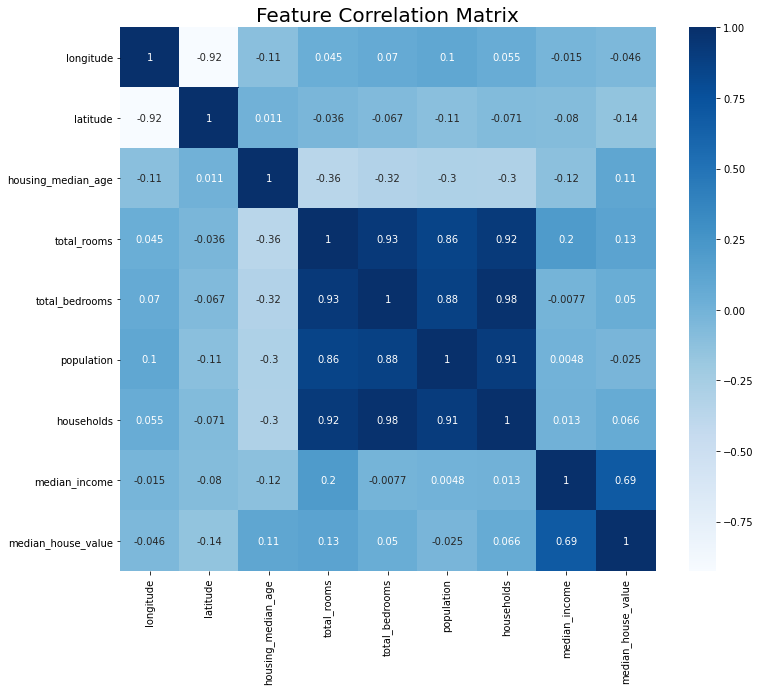

In [113]:
# 4. Is there multicolinearity present in the data? 
#    Are there features that are colinear or linearly dependent that we can drop?
plt.figure(figsize=(12,10))
sns.heatmap(housing.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

In [114]:
# 5. Do the features need to normalized or standardized?
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

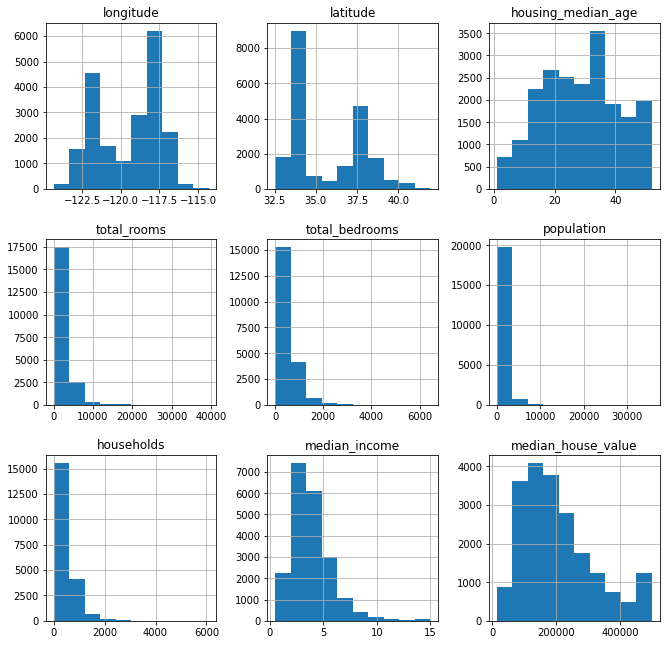

In [115]:
housing.hist(figsize=(11,11))

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# diabetes_X = sc.fit_transform(diabetes.drop('Outcome', axis=1))

##### Model Training

- _Which model makes sense for my data and predictions?_
- _How can the data set be split to train and test the model without overfitting?_

In [122]:
# 6. Which features do I need to train the model?
housing_X = housing.drop(['median_house_value', 'ocean_proximity', 'total_bedrooms'], axis=1)
housing_y = housing['median_house_value']

# 7. At what ratio should I split my training and testing data?
housing_X_train, housing_X_test, housing_y_train, housing_y_test = \
    train_test_split(housing_X, housing_y, test_size=0.25, random_state=42)

In [123]:
# fit training data to model and adjust any hyperparameters
from sklearn.linear_model import LinearRegression
housing_model = LinearRegression()
housing_model.fit(housing_X_train, housing_y_train)

print(housing_X_test[5:6])
print(housing_model.predict(housing_X_test[5:6]))

       longitude  latitude  housing_median_age  total_rooms  population  \
13311    -117.61     34.08                12.0       4427.0      2400.0   

       households  median_income  
13311       843.0         4.7147  
[209903.14814101]


##### Model Evaluation

- _Which metrics can you use to assess your model?_
- _Do other models have improved metric scores?_

The common metrics available for regression tasks are:
- Mean Squared Error (MSE): squared difference between the predicted and actual value
- Mean Absolute Error (MAE): average of the absolute difference between the predicted and actual value
- R-squared: the variance of the dependent variable explained by the independent variables; essentially is the strength of the relationship between the independent variables in your model and the dependent variables
- Adjusted R-squared: the variation explained by only the independent variables that actually affect the dependent variable not by every single independent variable

In [124]:
# 8. What do common metrics for the model tell us?
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
housing_y_hat = housing_model.predict(housing_X_test)
print("MAE: ", mean_absolute_error(housing_y_test, housing_y_hat))
print("MSE: ", mean_squared_error(housing_y_test, housing_y_hat))
print("R2: ", r2_score(housing_y_test, housing_y_hat))

MAE:  51259.696256696516
MSE:  4860305669.4701395
R2:  0.6326905102474192
